# 울산광역시 CCTV 현황 탐색

+ 데이터: 울산광역시 CCTV 설치현황, 울산광역시 주민등록인구

In [1]:
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
import numpy as np
import pandas as pd

# 울산 CCTV "ulsan_cctv.csv" 불러오기

In [3]:
cctv = pd.read_csv('/Users/escortkwon/Code/Advanced_AI_Course/5th Week/DNN 복습 실습/00. Pandas 활용 능력 평가/울산CCTV/data/ulsan_cctv.csv')
cctv.head()

,고유번호,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,경도,위도,데이터기준일자
0,379297,울산광역시 울주군청,NaN,울산광역시 울주군 범서읍 구영리 397-14,어린이보호,2,200,NaN,30,2021-12,052-204-0030,129.246708,35.567494,2020.2.25
1,379296,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 대안리 417,어린이보호,1,200,NaN,30,2021-12,052-204-0030,129.281470,35.408266,2020.2.25
2,379295,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 운화리 47-8,어린이보호,1,200,NaN,30,2021-12,052-204-0030,129.281236,35.413830,2020.2.25
3,379294,울산광역시 울주군청,NaN,울산광역시 울주군 언양읍 동부리 375-3,어린이보호,1,200,NaN,30,2021-12,052-204-0030,129.126308,35.570797,2020.2.25
4,379293,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 대안리 183-3,어린이보호,1,200,NaN,30,2021-12,052-204-0030,129.287578,35.409694,2020.2.25


## groupby로 카메라대수 집계(sum)하기

### 관리기관별 집계

In [4]:
cctv_region = cctv.groupby(by='관리기관명', as_index=False).sum()
cctv_region.drop(['고유번호', '카메라화소수', '보관일수', '경도', '위도'], axis=1, inplace=True)

In [5]:
cctv_region

,관리기관명,카메라대수
0,울산광역시 동구청,719
1,울산광역시 북구청,1211
2,울산광역시 울주군청,1110
3,울산광역시 중구,1321


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

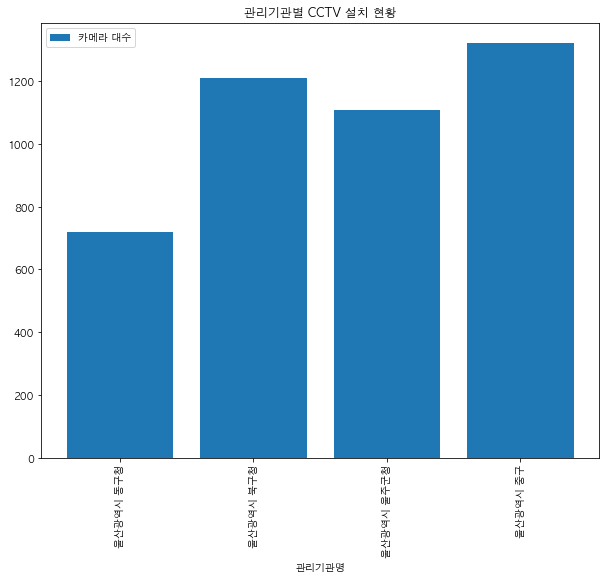

In [6]:
plt.figure(figsize=(10, 8))
plt.bar(cctv_region['관리기관명'], cctv_region['카메라대수'], label='카메라 대수')
plt.legend()
plt.title('관리기관별 CCTV 설치 현황')
plt.xlabel('관리기관명')
plt.xticks(rotation=90)


### 설치년월 기준으로 집계

In [7]:
cctv_month = cctv.groupby(by='설치년월', as_index=False).sum()
cctv_month.drop(['고유번호', '카메라화소수', '보관일수', '경도', '위도'], axis=1, inplace=True)

In [8]:
cctv_month

,설치년월,카메라대수
0,2021-01,146
1,2021-02,72
2,2021-03,104
3,2021-04,138
4,2021-05,453
5,2021-06,1310
6,2021-07,356
7,2021-08,521
8,2021-09,323
9,2021-10,188


Text(0.5, 0, '설치년월')

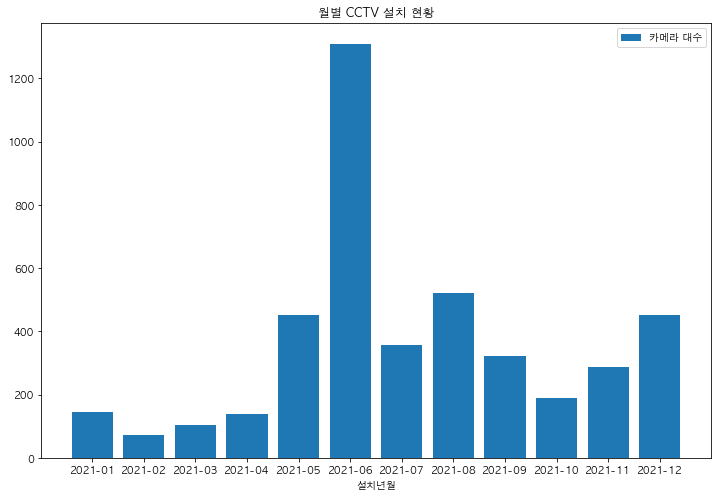

In [9]:
plt.figure(figsize=(12, 8))
plt.bar(cctv_month['설치년월'], cctv_month['카메라대수'], label='카메라 대수')
plt.legend()
plt.title('월별 CCTV 설치 현황')
plt.xlabel('설치년월')

### 관리기관별 설치목적구분을 기준으로 집계

In [10]:
cctv_purpose = cctv.groupby(by=['관리기관명', '설치목적구분'], as_index=False).sum()
cctv_purpose.drop(['고유번호', '카메라화소수', '보관일수', '경도', '위도'], axis=1, inplace=True)

In [11]:
cctv_purpose

,관리기관명,설치목적구분,카메라대수
0,울산광역시 동구청,생활방범,484
1,울산광역시 동구청,어린이보호,223
2,울산광역시 동구청,차량방범,12
3,울산광역시 북구청,교통단속,166
4,울산광역시 북구청,생활방범,715
5,울산광역시 북구청,쓰레기단속,58
6,울산광역시 북구청,어린이보호,245
7,울산광역시 북구청,재난재해,8
8,울산광역시 북구청,차량방범,19
9,울산광역시 울주군청,생활방범,530


# 울산 인구 "ulsan_population.csv" 불러오기

In [12]:
pop = pd.read_csv('/Users/escortkwon/Code/Advanced_AI_Course/5th Week/DNN 복습 실습/00. Pandas 활용 능력 평가/울산CCTV/data/ulsan_population.csv')

In [13]:
pop

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_총인구수,2020년12월_세대수,2020년12월_세대당 인구,2020년12월_남자 인구수,2020년12월_여자 인구수,2020년12월_남여 비율
0,울산광역시 (3100000000),"1,147,037","469,007",2.45,"589,233","557,804",1.06,"1,145,710","469,551",2.44,...,2.39,"584,305","553,040",1.06,"1,136,017","476,893",2.38,"583,708","552,309",1.06
1,울산광역시 중구 (3111000000),"223,060","92,994",2.40,"113,235","109,825",1.03,"222,395","92,927",2.39,...,2.34,"110,500","107,596",1.03,"217,595","93,212",2.33,"110,201","107,394",1.03
2,울산광역시 남구 (3114000000),"323,704","135,477",2.39,"164,993","158,711",1.04,"323,756","135,738",2.39,...,2.33,"163,513","157,203",1.04,"320,064","137,925",2.32,"163,198","156,866",1.04
3,울산광역시 동구 (3117000000),"159,294","65,167",2.44,"83,217","76,077",1.09,"158,809","65,189",2.44,...,2.39,"82,126","74,985",1.10,"156,806","65,815",2.38,"81,999","74,807",1.10
4,울산광역시 북구 (3120000000),"218,053","81,382",2.68,"112,773","105,280",1.07,"218,190","81,608",2.67,...,2.62,"113,325","105,557",1.07,"219,014","83,781",2.61,"113,392","105,622",1.07
5,울산광역시 울주군 (3171000000),"222,926","93,987",2.37,"115,015","107,911",1.07,"222,560","94,089",2.37,...,2.32,"114,841","107,699",1.07,"222,538","96,160",2.31,"114,918","107,620",1.07


## DataFrame 변형

+ stack()
+ unstack()

In [14]:
pop_stacked = pop.set_index('행정구역').stack()

In [15]:
pop_stacked = pop_stacked.reset_index()

## 행정구역 번호 제거

In [16]:
pop_stacked_new = pop_stacked["행정구역"].str.split("(", expand=True)[0]
pop_stacked_new # Series Object

0         울산광역시  
1         울산광역시  
2         울산광역시  
3         울산광역시  
4         울산광역시  
          ...    
427    울산광역시 울주군 
428    울산광역시 울주군 
429    울산광역시 울주군 
430    울산광역시 울주군 
431    울산광역시 울주군 
Name: 0, Length: 432, dtype: object

In [17]:
pop_stacked['행정구역'] = pop_stacked_new

In [18]:
pop_stacked

,행정구역,level_1,0
0,울산광역시,2020년01월_총인구수,"1,147,037"
1,울산광역시,2020년01월_세대수,"469,007"
2,울산광역시,2020년01월_세대당 인구,2.45
3,울산광역시,2020년01월_남자 인구수,"589,233"
4,울산광역시,2020년01월_여자 인구수,"557,804"
...,...,...,...
427,울산광역시 울주군,2020년12월_세대수,"96,160"
428,울산광역시 울주군,2020년12월_세대당 인구,2.31
429,울산광역시 울주군,2020년12월_남자 인구수,"114,918"
430,울산광역시 울주군,2020년12월_여자 인구수,"107,620"


## "level_1" 열(column)을 나눠서 "기간", "구분" 열(column)으로 만들기

In [19]:
pop_stacked['기간'] = pop_stacked['level_1'].str[0:8]
pop_stacked['구분'] = pop_stacked['level_1'].str[9:15]
pop_stacked.rename({0: '인구수'}, axis=1, inplace=True)
pop_stacked.drop(['level_1'], axis=1, inplace=True)
pop_stacked = pop_stacked[['행정구역', '기간', '구분', '인구수']]

In [20]:
pop_stacked

,행정구역,기간,구분,인구수
0,울산광역시,2020년01월,총인구수,"1,147,037"
1,울산광역시,2020년01월,세대수,"469,007"
2,울산광역시,2020년01월,세대당 인구,2.45
3,울산광역시,2020년01월,남자 인구수,"589,233"
4,울산광역시,2020년01월,여자 인구수,"557,804"
...,...,...,...,...
427,울산광역시 울주군,2020년12월,세대수,"96,160"
428,울산광역시 울주군,2020년12월,세대당 인구,2.31
429,울산광역시 울주군,2020년12월,남자 인구수,"114,918"
430,울산광역시 울주군,2020년12월,여자 인구수,"107,620"


## "구분" 열(column)을 피벗하여 변형하기

In [21]:
pop_pivot = pd.pivot(pop_stacked, index=['행정구역', '기간'], columns='구분')

In [22]:
pop_pivot

인구수                                             
구분                 남여 비율   남자 인구수 세대당 인구      세대수   여자 인구수       총인구수
행정구역      기간                                                         
울산광역시     2020년01월  1.06  589,233   2.45  469,007  557,804  1,147,037
          2020년02월  1.06  588,626   2.44  469,551  557,084  1,145,710
          2020년03월  1.06  588,127   2.43  470,294  556,436  1,144,563
          2020년04월  1.06  587,902   2.43  471,153  556,196  1,144,098
          2020년05월  1.06  587,434   2.42  472,255  555,714  1,143,148
...                  ...      ...    ...      ...      ...        ...
울산광역시 중구  2020년08월  1.03  111,137   2.36   93,093  108,112    219,249
          2020년09월  1.03  110,913   2.35   93,138  107,949    218,862
          2020년10월  1.03  110,780   2.35   93,207  107,791    218,571
          2020년11월  1.03  110,500   2.34   93,192  107,596    218,096
          2020년12월  1.03  110,201   2.33   93,212  107,394    217,595

[72 rows x 6 columns]

## 2020년 12월 인구 데이터만 남기기

In [23]:
pop_stacked['행정구역'].unique()

array(['울산광역시  ', '울산광역시 중구 ', '울산광역시 남구 ', '울산광역시 동구 ', '울산광역시 북구 ',
       '울산광역시 울주군 '], dtype=object)

In [38]:
pop_stacked['행정구역', '울산광역시  '] = '울산광역시'

In [40]:
cond1 = pop_stacked['기간'] == "2020년12월"
cond2 = pop_stacked['행정구역'] != "울산광역시  "
pop_result = pop_stacked[cond1 & cond2]
pop_result.reset_index(drop=True, inplace=True)
pop_result

,행정구역,기간,구분,인구수,"(행정구역, 울산광역시 )"
0,울산광역시 중구,2020년12월,총인구수,"217,595",울산광역시
1,울산광역시 중구,2020년12월,세대수,"93,212",울산광역시
2,울산광역시 중구,2020년12월,세대당 인구,2.33,울산광역시
3,울산광역시 중구,2020년12월,남자 인구수,"110,201",울산광역시
4,울산광역시 중구,2020년12월,여자 인구수,"107,394",울산광역시
5,울산광역시 중구,2020년12월,남여 비율,1.03,울산광역시
6,울산광역시 남구,2020년12월,총인구수,"320,064",울산광역시
7,울산광역시 남구,2020년12월,세대수,"137,925",울산광역시
8,울산광역시 남구,2020년12월,세대당 인구,2.32,울산광역시
9,울산광역시 남구,2020년12월,남자 인구수,"163,198",울산광역시


# DataFrame 결합

In [26]:
merge_df = pd.merge(pop_result, pd.DataFrame(pop_stacked['카메라대수']), how='inner', on=None)

# 남구청 제외

KeyError: '카메라대수'

In [ ]:
merge_df

NameError: name 'merge_df' is not defined

## 구분 column의 "총인구수"만 남기고 행정구역별 총인구를 cctv 카메라대수로 나눠 "인구대비cctv" 열(column) 생성하기
* "카메라대수" / "인구수" - "인구대비cctv"

In [ ]:
# 아래에 코드를 작성하세요.


In [ ]:
result

## 행정구역 - 인구대비cctv 시각화하기

In [ ]:
# 아래에 코드를 작성하세요.
